# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Евклидова норма разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [4]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [5]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [9]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: https://contest.yandex.ru/contest/19551/run-report/36506687/
* **StochasticDescent**: https://contest.yandex.ru/contest/19551/run-report/36506697/
* **MomentumDescent**: https://contest.yandex.ru/contest/19551/run-report/36506701/
* **Adagrad**: https://contest.yandex.ru/contest/19551/run-report/36507188/
* **LinearRegression**: https://contest.yandex.ru/contest/19551/run-report/36847828/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [10]:
import pandas as pd 
data = pd.read_csv('autos.csv')
data.drop('lastSeen', axis='columns', inplace=True)

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,96224,2000


In [12]:
from sklearn.model_selection import train_test_split

y = data["price"]
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train MSE = 1.3642
Test MSE = 1.3812


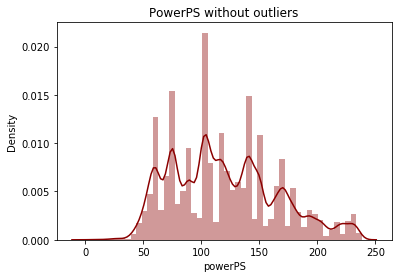

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")
%matplotlib inline
 
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
X_train['log_price'] = y_train
X_test['log_price'] = y_test

y_pred_train = np.full(len(y_train), y_train.mean())
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=True))
y_pred_test = np.full(len(y_test), y_train.mean())
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=True))

X_train = X_train.loc[X_train['powerPS'] < X_train['powerPS'].quantile(0.95)]
y_train = y_train[y_train.index.isin(X_train.index)]
sns.distplot(X_train['powerPS'], color='darkred')
plt.ylabel("Density")
plt.title("PowerPS without outliers")
plt.show()

In [14]:
X_train.groupby('monthOfRegistration').count()['brand']
# let's set month 0 meaning "not stated"

monthOfRegistration
0      4388
1     13279
2     12616
3     20661
4     16953
5     16647
6     18016
7     15492
8     13024
9     14098
10    15134
11    13829
12    13816
Name: brand, dtype: int64

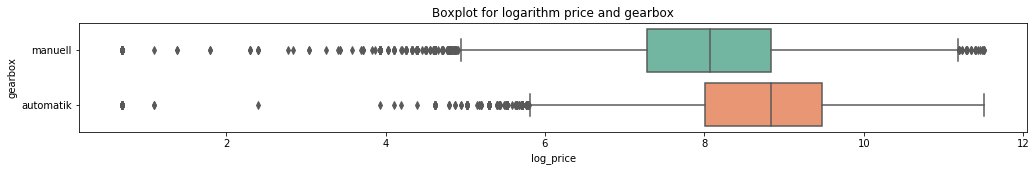

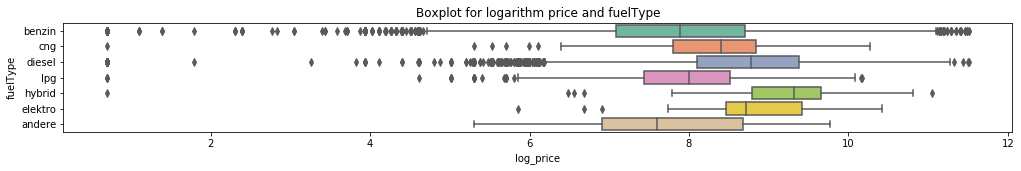

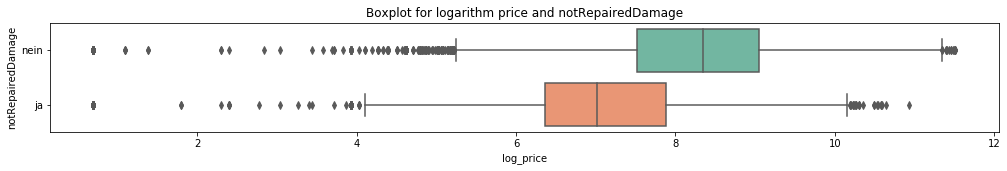

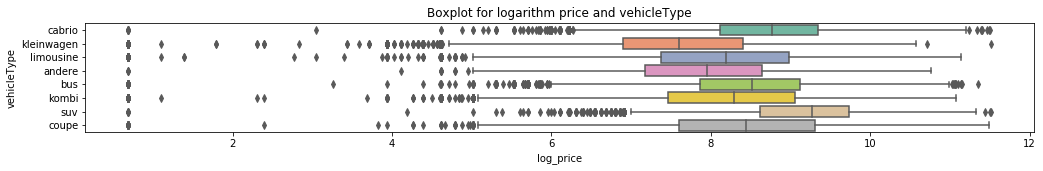

In [15]:
plt.figure(figsize=(17,2))
sns.boxplot(x='log_price', y='gearbox', data=X_train, orient='h', palette="Set2")
plt.title('Boxplot for logarithm price and gearbox')
plt.show()

plt.figure(figsize=(17,2))
sns.boxplot(x='log_price', y='fuelType', data=X_train, orient='h', palette="Set2")
plt.title('Boxplot for logarithm price and fuelType')
plt.show()

plt.figure(figsize=(17,2))
sns.boxplot(x='log_price', y='notRepairedDamage', data=X_train, orient='h', palette="Set2")
plt.title('Boxplot for logarithm price and notRepairedDamage')
plt.show()

plt.figure(figsize=(17,2))
sns.boxplot(x='log_price', y='vehicleType', data=X_train, orient='h', palette="Set2")
plt.title('Boxplot for logarithm price and vehicleType')
plt.show()

Cудя по графикам *boxplot*, в частности по значениям медиан,  с данными все в порядке, не будем их менять.

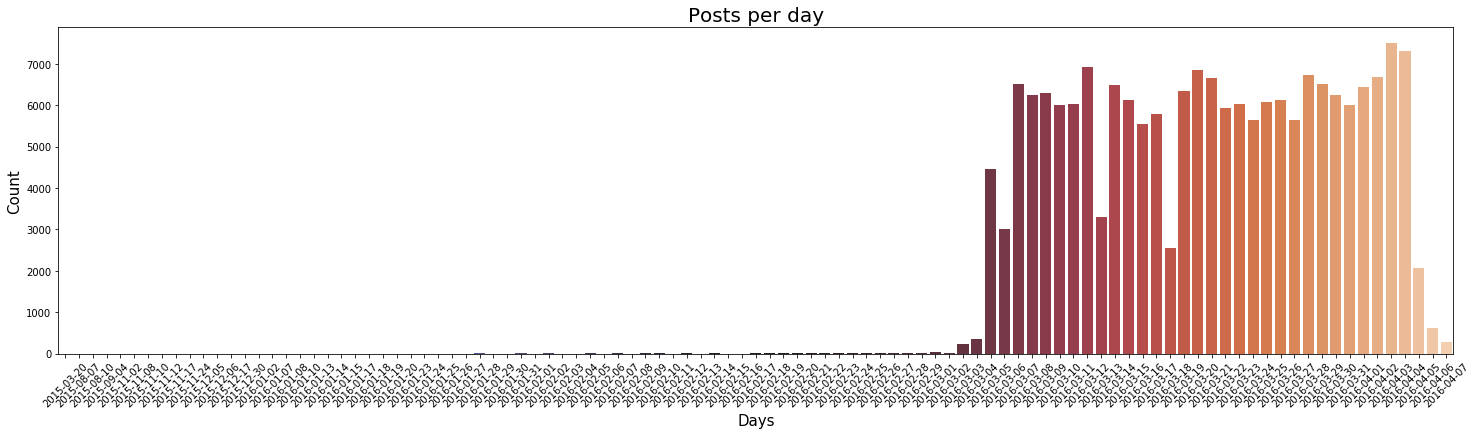

In [16]:
X_train['dateCreated'] = np.stack(X_train['dateCreated'].str.split(' ').values)[:, [0]]
X_test['dateCreated'] = np.stack(X_test['dateCreated'].str.split(' ').values)[:, [0]]

pickup_date = X_train['dateCreated'].sort_values()
plt.figure(figsize=(25,6))
plt.xticks(rotation=45)
sns_plot = sns.countplot(x=pickup_date, data=X_train, palette="icefire")
plt.title("Posts per day", fontsize = 20)
plt.xlabel('Days',fontsize = 15)
plt.ylabel('Сount', fontsize = 15)
fig = sns_plot.get_figure()
plt.show()

X_train = X_train.loc[X_train['dateCreated'] > '2016-03-01']
y_train = y_train[y_train.index.isin(X_train.index)]

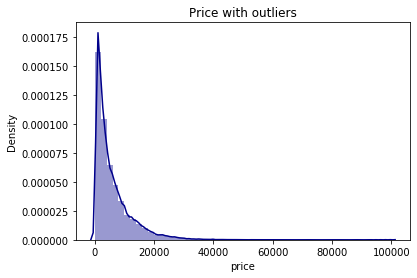

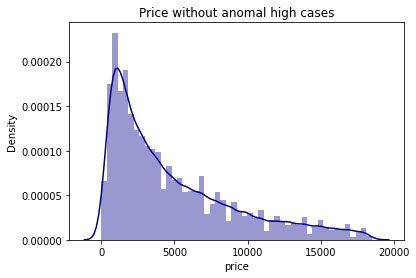

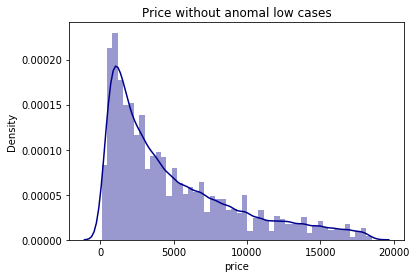

In [17]:
sns.distplot(X_train['price'], color='darkblue')
plt.ylabel("Density")
plt.title("Price with outliers")
plt.show()
y_train.quantile(0.95)
X_train['price'] = X_train['price'].loc[X_train['price'] < X_train['price'].quantile(0.95)]
sns.distplot(X_train['price'], color='darkblue')
plt.ylabel("Density")
plt.title("Price without anomal high cases")
plt.show()
X_train['price'] = X_train['price'].loc[X_train['price'] > 100]
sns.distplot(X_train['price'], color='darkblue')
plt.ylabel("Density")
plt.title("Price without anomal low cases")
plt.show()
y_train = y_train[y_train.index.isin(X_train['price'].index)]

In [18]:
check = pd.DataFrame()
check = X_train
check.corr()

,powerPS,kilometer,yearOfRegistration,monthOfRegistration,postalCode,price,log_price
powerPS,1.000000,0.046694,0.213067,0.028175,0.065716,0.465609,0.503843
kilometer,0.046694,1.000000,-0.416420,-0.004583,-0.029379,-0.413932,-0.434134
yearOfRegistration,0.213067,-0.416420,1.000000,0.022870,0.037735,0.578244,0.599429
monthOfRegistration,0.028175,-0.004583,0.022870,1.000000,0.003667,0.031977,0.049100
postalCode,0.065716,-0.029379,0.037735,0.003667,1.000000,0.054766,0.067472
price,0.465609,-0.413932,0.578244,0.031977,0.054766,1.000000,0.890200
log_price,0.503843,-0.434134,0.599429,0.049100,0.067472,0.890200,1.000000


In [19]:
X_train.drop(['postalCode', 'monthOfRegistration', 'log_price', 'price'], axis='columns', inplace=True)
X_test.drop(['postalCode', 'monthOfRegistration', 'log_price', 'price'], axis='columns', inplace=True)

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=16)

In [22]:
X_valid.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,dateCreated
7799,ford,ka,kleinwagen,manuell,benzin,nein,60,150000,2001,2016-04-01
188801,bmw,7er,limousine,automatik,benzin,nein,188,150000,1989,2016-03-11
172061,bmw,z_reihe,cabrio,automatik,benzin,nein,140,125000,1998,2016-03-10
102451,opel,astra,coupe,manuell,benzin,nein,192,150000,2001,2016-03-29
57847,volkswagen,golf,kleinwagen,manuell,benzin,ja,60,150000,1991,2016-03-08


In [23]:
y_pred_train = np.full(len(y_train), y_train.mean())
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=True))
y_pred_test = np.full(len(y_test), y_train.mean())
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=True))

Train MSE = 1.2663
Test MSE = 1.3878


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

Lambda = 0.0316 loss = 4.7687
Lambda = 0.1000 loss = 1.5100
Lambda = 0.3162 loss = 0.7986
Lambda = 1.0000 loss = 0.4612
Lambda = 3.1623 loss = 1382013414.0097


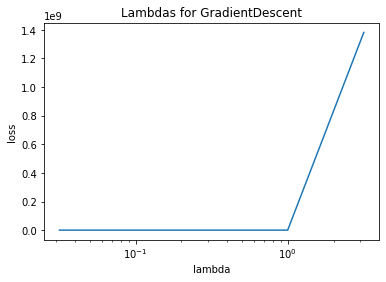

Best GradientDescent lambda = 1.00000

Lambda = 0.0010 loss = 66.7903
Lambda = 0.0056 loss = 39.8026
Lambda = 0.0316 loss = 5.3944
Lambda = 0.1778 loss = 1.8482
Lambda = 1.0000 loss = 593712246.5247


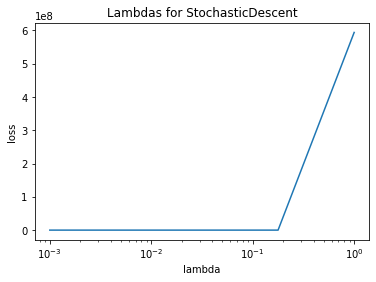

Best StochasticDescent lambda = 0.17783

Lambda = 0.1000 loss = 1.4366
Lambda = 0.1778 loss = 1.0709
Lambda = 0.3162 loss = 0.7430
Lambda = 0.5623 loss = 0.5521
Lambda = 1.0000 loss = 0.4452


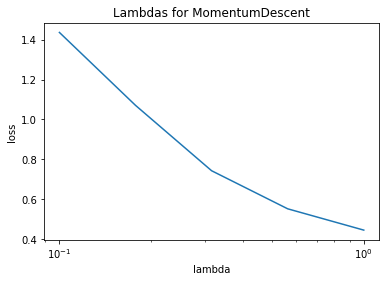

Best MomentumDescent lambda = 1.00000

Lambda = 0.0100 loss = 67.4900
Lambda = 0.1778 loss = 57.2929
Lambda = 3.1623 loss = 1.4512
Lambda = 56.2341 loss = 0.6551
Lambda = 1000.0000 loss = 7.6237


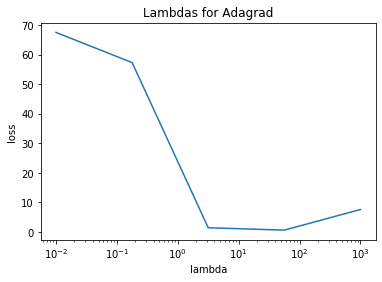

Best Adagrad lambda = 56.23413


In [123]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

best_lambda = []

categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'yearOfRegistration', 'dateCreated']
numeric_features = ['powerPS', 'kilometer']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical),
    ('scaling', StandardScaler(), numeric_features),
])

w0 = np.zeros(column_transformer.fit_transform(X_train).shape[1])

lambdas = np.logspace(-1.5, 0.5, 5)
scores = []
for lmbd in lambdas:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearRegression(descent = GradientDescent(lambda_ = lmbd, w0 = w0)))
    ])
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    scores.append(mean_squared_error(y_valid, y_pred, squared=True))
    print('Lambda = %.4f' % lmbd, 'loss = %.4f' % scores[-1])

plt.plot(lambdas, scores)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("loss")
plt.title('Lambdas for GradientDescent')
plt.show()
best_lambda.append(lambdas[np.argmin(scores)])
print("Best GradientDescent lambda = %.5f" % best_lambda[-1])
print()

lambdas = np.logspace(-3, 0, 5)
scores = []
for lmbd in lambdas:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearRegression(descent = StochasticDescent(lambda_ = lmbd, w0 = w0)))
    ])
    model = pipeline.fit(X_train, np.array(y_train))
    y_pred = model.predict(X_valid)
    scores.append(mean_squared_error(y_valid, y_pred, squared=True))
    print('Lambda = %.4f' % lmbd, 'loss = %.4f' % scores[-1])

plt.plot(lambdas, scores)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("loss")
plt.title('Lambdas for StochasticDescent')
plt.show()
best_lambda.append(lambdas[np.argmin(scores)])
print("Best StochasticDescent lambda = %.5f" % best_lambda[-1])
print()

lambdas = np.logspace(-1, 0, 5)
scores = []
for lmbd in lambdas:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearRegression(descent = MomentumDescent(lambda_ = lmbd, w0 = w0)))
    ])
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    scores.append(mean_squared_error(y_valid, y_pred, squared=True))
    print('Lambda = %.4f' % lmbd, 'loss = %.4f' % scores[-1])

plt.plot(lambdas, scores)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("loss")
plt.title('Lambdas for MomentumDescent')
plt.show()
best_lambda.append(lambdas[np.argmin(scores)])
print("Best MomentumDescent lambda = %.5f" % best_lambda[-1])
print()

lambdas = np.logspace(-2, 3, 5)
scores = []
for lmbd in lambdas:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearRegression(descent = Adagrad(lambda_ = lmbd, w0 = w0)))
    ])
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    scores.append(mean_squared_error(y_valid, y_pred, squared=True))
    print('Lambda = %.4f' % lmbd, 'loss = %.4f' % scores[-1])


plt.plot(lambdas, scores)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("loss")
plt.title('Lambdas for Adagrad')
plt.show()
best_lambda.append(lambdas[np.argmin(scores)])
print("Best Adagrad lambda = %.5f" % best_lambda[-1])

In [151]:
from sklearn.metrics import r2_score

descents = [GradientDescent, StochasticDescent, MomentumDescent, Adagrad]
losses = []
for i in range(4):
    regression = LinearRegression(descent = descents[i](lambda_ = best_lambda[i], w0 = w0))
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', regression)
    ])
    model = pipeline.fit(X_train, np.array(y_train))
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(descents[i].__name__, "test MSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=True))
    print(descents[i].__name__, "train MSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=True))
    print(descents[i].__name__, "test R2 = %.4f" % r2_score(y_test, y_pred_test))
    print(descents[i].__name__, "train R2 = %.4f" % r2_score(y_train, y_pred_train))
    losses.append(regression.loss_history)
    print('# of steps before convergence =', len(losses[-1]))

GradientDescent test MSE = 0.4873
GradientDescent train MSE = 0.4481
GradientDescent test R2 = 0.6472
GradientDescent train R2 = 0.6461
# of steps before convergence = 21
StochasticDescent test MSE = 9.7781
StochasticDescent train MSE = 8.0706
StochasticDescent test R2 = -6.0793
StochasticDescent train R2 = -5.3734
# of steps before convergence = 21
MomentumDescent test MSE = 0.4692
MomentumDescent train MSE = 0.4319
MomentumDescent test R2 = 0.6603
MomentumDescent train R2 = 0.6589
# of steps before convergence = 21
Adagrad test MSE = 0.7384
Adagrad train MSE = 0.6432
Adagrad test R2 = 0.4654
Adagrad train R2 = 0.4921
# of steps before convergence = 19


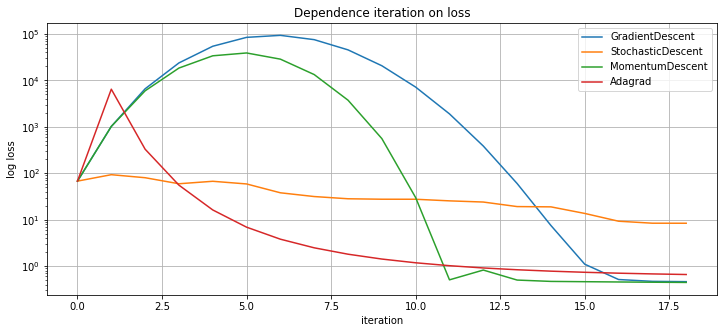

In [152]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(np.arange(19), losses[0][:19], np.arange(19), losses[1][:19], np.arange(19), losses[2][:19],\
         np.arange(19), losses[3][:19])
plt.legend(['GradientDescent', 'StochasticDescent', 'MomentumDescent', 'Adagrad'])
plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("log loss")
plt.title('Dependence iteration on loss')
plt.show()

Ну что ж. Глядя на методы, можно сказать, что лучший результат предоставляет *MomentumDescent*, тк в данном случае ошибка MSE минимальна. Также во всех данных наблюдается тенденция к росту ошибки при начальных итерациях. Первым сходиться начинает метод *Adagrad*, затем остальные. 

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [126]:
import time as t

batch_sizes = np.arange(5, 500, 10)
times = []
steps = []
for batch in batch_sizes:
    tm = []
    stp = []
    for k in range(10):
        regression = LinearRegression(descent = StochasticDescent(lambda_ = best_lambda[1], w0 = w0, batch_size = batch))
        pipeline = Pipeline(steps=[
            ('ohe_and_scaling', column_transformer),
            ('regression', regression)
        ])
        start = t.time()
        model = pipeline.fit(X_train, np.array(y_train))
        fin = t.time()
        tm.append(fin - start)
        stp.append(len(regression.loss_history))
    times.append(np.array(tm))
    steps.append(np.array(stp))
times_gr = []
steps_gr = []
for i in range(len(batch_sizes)):
    num_t = np.mean(times[i])
    num_s = np.var(steps[i])
    times_gr.append(num_t)
    steps_gr.append(num_s)
    print('For batch size =', batch_sizes[i], 'mean time = %.4f' %num_t, 'and variance of #steps = %.4f' %num_s)

For batch size = 5 mean time = 3.2162 and variance of #steps = 23.8400
For batch size = 15 mean time = 2.8135 and variance of #steps = 38.8100
For batch size = 25 mean time = 2.4456 and variance of #steps = 59.2400
For batch size = 35 mean time = 2.1140 and variance of #steps = 16.4400
For batch size = 45 mean time = 2.0982 and variance of #steps = 16.8900
For batch size = 55 mean time = 1.9062 and variance of #steps = 13.8100
For batch size = 65 mean time = 2.1001 and variance of #steps = 12.8100
For batch size = 75 mean time = 2.0103 and variance of #steps = 3.6100
For batch size = 85 mean time = 1.8963 and variance of #steps = 9.6400
For batch size = 95 mean time = 1.8500 and variance of #steps = 4.2400
For batch size = 105 mean time = 1.8817 and variance of #steps = 6.4100
For batch size = 115 mean time = 1.8052 and variance of #steps = 4.6000
For batch size = 125 mean time = 1.8729 and variance of #steps = 5.3600
For batch size = 135 mean time = 1.7743 and variance of #steps = 2.4

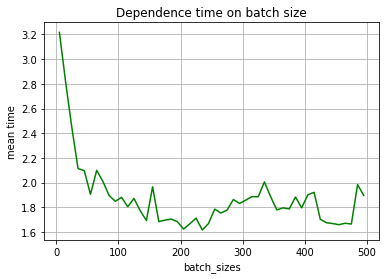

In [127]:
plt.plot(batch_sizes, times_gr, color = 'green')
plt.grid(True)
plt.xlabel("batch_sizes")
plt.ylabel("mean time")
plt.title('Dependence time on batch size')
plt.show()

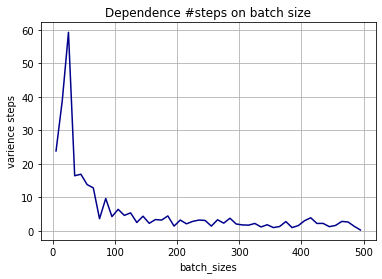

In [128]:
plt.plot(batch_sizes, steps_gr, color = 'darkblue')
plt.grid(True)
plt.xlabel("batch_sizes")
plt.ylabel("varience steps")
plt.title('Dependence #steps on batch size')
plt.show()

Перейдём к долгожданным выводам. Заметим, что при увеличении *batch_size* функция сходится быстреe. Как было сказано на семинаре *Чем больше размер batch_size, тем более стабильная траектория градиентного спуска*. На среднее время обучения изменение параметра никак не повлияло.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [67]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

In [173]:
best_lambda_reg = []
best_mu = []

lambdas = np.logspace(-1.5, 0, 5)
mus = np.logspace(-4, 1, 5)
scores = []
history = []
cnt = 0
ind = 0
curr_sum = np.inf
for lmbd in lambdas:
    for mu in mus:
        regression = LinearRegression(descent = GradientDescentReg(lambda_ = lmbd, w0 = w0, mu = mu))
        pipeline = Pipeline(steps=[
            ('ohe_and_scaling', column_transformer),
            ('regression', regression)
        ])
        model = pipeline.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        scores.append(mean_squared_error(y_valid, y_pred, squared=True))
        history.append(len(regression.loss_history))
        print('Lambda = %.4f' % lmbd, 'mu = %.6f' %mu, 'convergence =', history[-1], \
              'loss = %.6f' % scores[-1])
        if history[-1] + scores[-1] < curr_sum:
            curr_sum = history[-1] + scores[-1]
            ind = cnt
        cnt += 1
        
best_lambda_reg.append(lambdas[ind // 5])
best_mu.append(mus[ind % 5])
print("Best GradientDescent lambda = %.5f" % best_lambda_reg[-1], 'mu = %.6f' % best_mu[-1])
print()

lambdas = np.logspace(-3, -0.7, 5)
mus = np.logspace(-4, 1, 5)
scores = []
cnt = 0
ind = 0
curr_sum = np.inf
for lmbd in lambdas:
    for mu in mus:
        regression = LinearRegression(descent = StochasticDescentReg(lambda_ = lmbd, w0 = w0, mu = mu))
        pipeline = Pipeline(steps=[
            ('ohe_and_scaling', column_transformer),
            ('regression', regression)
        ])
        model = pipeline.fit(X_train, np.array(y_train))
        y_pred = model.predict(X_valid)
        scores.append(mean_squared_error(y_valid, y_pred, squared=True))
        history.append(len(regression.loss_history))
        print('Lambda = %.4f' % lmbd, 'mu = %.6f' %mu, 'convergence =', history[-1], \
              'loss = %.6f' % scores[-1])
        if history[-1] + scores[-1] < curr_sum:
            curr_sum = history[-1] + scores[-1]
            ind = cnt
        cnt += 1

best_lambda_reg.append(lambdas[ind // 5])
best_mu.append(mus[ind % 5])
print("Best StochasticDescent lambda = %.5f" % best_lambda_reg[-1], 'mu = %.6f' % best_mu[-1])
print()

lambdas = np.logspace(-1, 0, 5)
mus = np.logspace(-4, 1, 5)
scores = []
cnt = 0
ind = 0
curr_sum = np.inf
for lmbd in lambdas:
    for mu in mus:
        regression = LinearRegression(descent = MomentumDescentReg(lambda_ = lmbd, w0 = w0, mu = mu))
        pipeline = Pipeline(steps=[
            ('ohe_and_scaling', column_transformer),
            ('regression', regression)
        ])
        model = pipeline.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        scores.append(mean_squared_error(y_valid, y_pred, squared=True))
        history.append(len(regression.loss_history))
        print('Lambda = %.4f' % lmbd, 'mu = %.6f' %mu, 'convergence =', history[-1], \
              'loss = %.6f' % scores[-1])
        if history[-1] + scores[-1] < curr_sum:
            curr_sum = history[-1] + scores[-1]
            ind = cnt
        cnt += 1

best_lambda_reg.append(lambdas[ind // 5])
best_mu.append(mus[ind % 5])
print("Best MomentumDescent lambda = %.5f" % best_lambda_reg[-1], 'mu = %.6f' % best_mu[-1])
print()

lambdas = np.logspace(-2, 3, 5)
mus = np.logspace(-4, 1, 5)
scores = []
cnt = 0
ind = 0
curr_sum = np.inf
for lmbd in lambdas:
    for mu in mus:
        regression = LinearRegression(descent = AdagradReg(lambda_ = lmbd, w0 = w0, mu = mu))
        pipeline = Pipeline(steps=[
            ('ohe_and_scaling', column_transformer),
            ('regression', regression)
        ])
        model = pipeline.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        scores.append(mean_squared_error(y_valid, y_pred, squared=True))
        history.append(len(regression.loss_history))
        print('Lambda = %.4f' % lmbd, 'mu = %.6f' %mu, 'convergence =', history[-1], \
              'loss = %.6f' % scores[-1])
        if history[-1] + scores[-1] < curr_sum:
            curr_sum = history[-1] + scores[-1]
            ind = cnt
        cnt += 1

best_lambda_reg.append(lambdas[ind // 5])
best_mu.append(mus[ind % 5])
print("Best Adagrad lambda = %.5f" % best_lambda_reg[-1], 'mu = %.6f' % best_mu[-1])

Lambda = 0.0316 mu = 0.000100 convergence = 32 loss = 4.768908
Lambda = 0.0316 mu = 0.001778 convergence = 32 loss = 4.773212
Lambda = 0.0316 mu = 0.031623 convergence = 31 loss = 5.014101
Lambda = 0.0316 mu = 0.562341 convergence = 28 loss = 7.043284
Lambda = 0.0316 mu = 10.000000 convergence = 8 loss = 34.225296
Lambda = 0.0750 mu = 0.000100 convergence = 20 loss = 1.779265
Lambda = 0.0750 mu = 0.001778 convergence = 20 loss = 1.781332
Lambda = 0.0750 mu = 0.031623 convergence = 19 loss = 1.870942
Lambda = 0.0750 mu = 0.562341 convergence = 16 loss = 3.206275
Lambda = 0.0750 mu = 10.000000 convergence = 3 loss = 31.455325
Lambda = 0.1778 mu = 0.000100 convergence = 16 loss = 1.128889
Lambda = 0.1778 mu = 0.001778 convergence = 16 loss = 1.129633
Lambda = 0.1778 mu = 0.031623 convergence = 15 loss = 1.165736
Lambda = 0.1778 mu = 0.562341 convergence = 10 loss = 2.181174
Lambda = 0.1778 mu = 10.000000 convergence = 7 loss = 31.687043
Lambda = 0.4217 mu = 0.000100 convergence = 20 loss 

In [174]:
losses_reg = []
descents_reg = [GradientDescentReg, StochasticDescentReg, MomentumDescentReg, AdagradReg]

for i in range(4):
    regression = LinearRegression(descent = descents[i](lambda_ = best_lambda[i], w0 = w0))
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', regression)
    ])
    model = pipeline.fit(X_train, np.array(y_train))
    y_pred = model.predict(X_test)
    regression_reg = LinearRegression(descent = descents_reg[i](lambda_ = best_lambda_reg[i], w0 = w0, mu = best_mu[i]))
    pipeline_reg = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', regression_reg)
    ])
    model_reg = pipeline_reg.fit(X_train, np.array(y_train))
    y_pred_reg = model_reg.predict(X_test)
    print(descents[i].__name__, "Non-reg test MSE = %.5f" % mean_squared_error(y_test, y_pred, squared=True))
    print(descents[i].__name__, "Reg test MSE = %.5f" % mean_squared_error(y_test, y_pred_reg, squared=True))
    print(descents[i].__name__, "Non-reg test R2 = %.5f" % r2_score(y_test, y_pred))
    print(descents[i].__name__, "Reg test R2 = %.5f" % r2_score(y_test, y_pred_reg))
    print(descents[i].__name__, 'Non-reg # of steps before convergence =', len(losses[i]))
    losses_reg.append(regression_reg.loss_history)
    print(descents[i].__name__, 'Reg # of steps before convergence =', len(losses_reg[-1]))

GradientDescent Non-reg test MSE = 0.48726
GradientDescent Reg test MSE = 1.94585
GradientDescent Non-reg test R2 = 0.64722
GradientDescent Reg test R2 = -0.40879
GradientDescent Non-reg # of steps before convergence = 21
GradientDescent Reg # of steps before convergence = 7
StochasticDescent Non-reg test MSE = 5.49859
StochasticDescent Reg test MSE = 9.70718
StochasticDescent Non-reg test R2 = -2.98095
StochasticDescent Reg test R2 = -6.02795
StochasticDescent Non-reg # of steps before convergence = 21
StochasticDescent Reg # of steps before convergence = 7
MomentumDescent Non-reg test MSE = 0.46921
MomentumDescent Reg test MSE = 1.90986
MomentumDescent Non-reg test R2 = 0.66029
MomentumDescent Reg test R2 = -0.38273
MomentumDescent Non-reg # of steps before convergence = 21
MomentumDescent Reg # of steps before convergence = 8
Adagrad Non-reg test MSE = 0.73841
Adagrad Reg test MSE = 2.59698
Adagrad Non-reg test R2 = 0.46540
Adagrad Reg test R2 = -0.88020
Adagrad Non-reg # of steps b

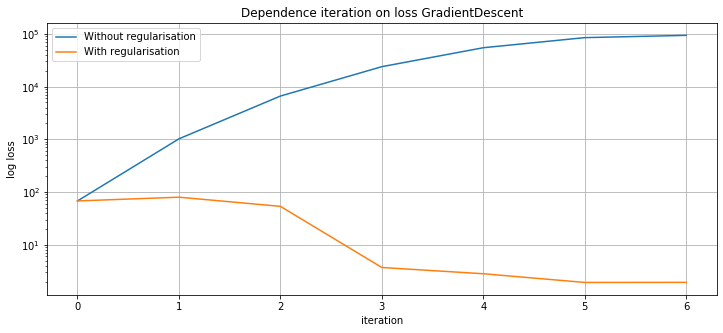

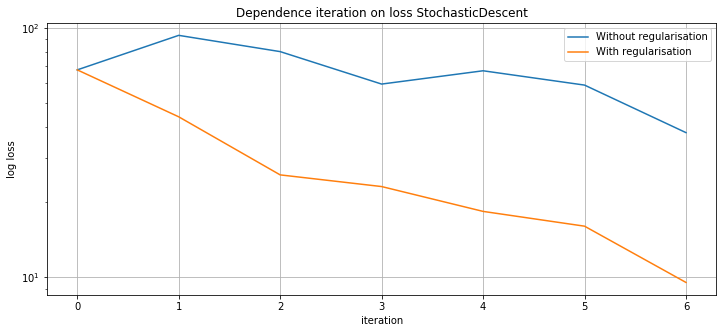

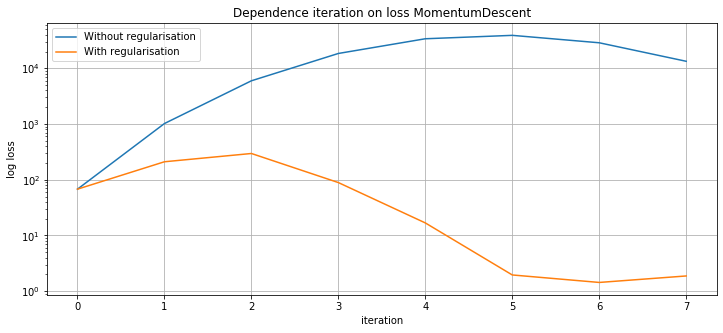

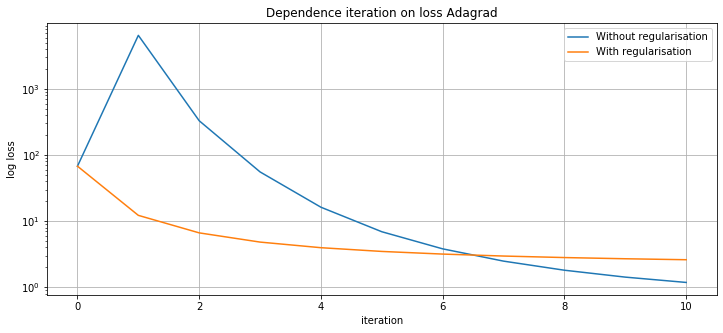

In [175]:
for i in range(4):
    size = min(len(losses[i]), len(losses_reg[i]))
    plt.figure(figsize=(12,5))
    plt.grid(True)
    plt.plot(np.arange(size), losses[i][:size], np.arange(size), losses_reg[i][:size])
    plt.legend(['Without regularisation', 'With regularisation'])
    plt.yscale("log")
    plt.xlabel("iteration")
    plt.ylabel("log loss")
    name = descents[i].__name__
    plt.title('Dependence iteration on loss {}'.format(name))
    plt.show()

И снова выводы. Регуляризация применяется для увеличение скорости сходимости и штраф больших весов, поэтому в данном случае при подборе оптимальных параметров я старалсь найти что-то среднее между качестом и числом итераций сходимости.Скорость сходимости на отрегулированных данных значительно улучшилась, в то время как качеством пришлось пожертвовать. Главное преимущество отрегулированной модели это предотвращение переобучения за счёт штрафов больших весов. Из-за этой особенности функция быстрее стремиться к нулю.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [207]:
from utils import (
    StochasticAverageGradient,
)

Lambda = 0.0316 loss = 67.7437
Lambda = 0.1000 loss = 67.7437
Lambda = 0.3162 loss = 67.7437
Lambda = 1.0000 loss = 67.7437
Lambda = 3.1623 loss = 67.7437


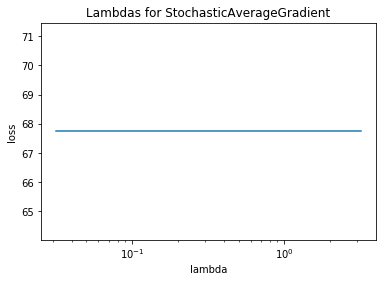

Best StochasticAverageGradient lambda = 0.03162



In [208]:
best_lambda8 = [best_lambda[0]]

lambdas = np.logspace(-1.5, 0.5, 5)
scores = []
for lmbd in lambdas:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', LinearRegression(descent = StochasticAverageGradient(x_shape =\
                                                                            column_transformer.fit_transform(X_train).shape[1],\
                                                                            lambda_ = lmbd, w0 = w0)))
    ])
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    scores.append(mean_squared_error(y_valid, y_pred, squared=True))
    print('Lambda = %.4f' % lmbd, 'loss = %.4f' % scores[-1])

plt.plot(lambdas, scores)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("loss")
plt.title('Lambdas for StochasticAverageGradient')
plt.show()
best_lambda8.append(lambdas[np.argmin(scores)])
print("Best StochasticAverageGradient lambda = %.5f" % best_lambda8[-1])
print()

In [209]:
descents = [GradientDescent, StochasticAverageGradient]
losses = []
for i in range(2):
    if i == 0:
        regression = LinearRegression(descent = descents[i](lambda_ = best_lambda8[i], w0 = w0))
    else:
        regression = LinearRegression(descent = descents[i](x_shape = 4, lambda_ = best_lambda8[i], w0 = w0))
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', regression)
    ])
    model = pipeline.fit(X_train, np.array(y_train))
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(descents[i].__name__, "test MSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=True))
    print(descents[i].__name__, "train MSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=True))
    print(descents[i].__name__, "test R2 = %.4f" % r2_score(y_test, y_pred_test))
    print(descents[i].__name__, "train R2 = %.4f" % r2_score(y_train, y_pred_train))
    losses.append(regression.loss_history)
    print('# of steps before convergence =', len(losses[-1]))

GradientDescent test MSE = 0.4873
GradientDescent train MSE = 0.4481
GradientDescent test R2 = 0.6472
GradientDescent train R2 = 0.6461
# of steps before convergence = 21
StochasticAverageGradient test MSE = 69.2019
StochasticAverageGradient train MSE = 67.7539
StochasticAverageGradient test R2 = -49.1018
StochasticAverageGradient train R2 = -52.5060
# of steps before convergence = 1


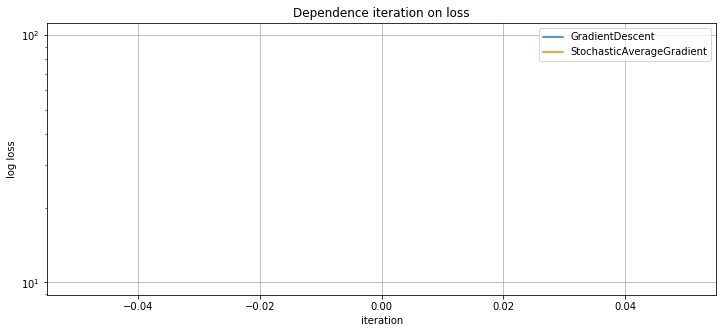

In [210]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(np.arange(1), losses[0][:1], np.arange(1), losses[1][:1])
plt.legend(['GradientDescent', 'StochasticAverageGradient'])
plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("log loss")
plt.title('Dependence iteration on loss')
plt.show()

Новый метод очень зависит от рандома, поэтому работает не самым лучшим образом (очень плохо), хотя по своей структуре *SAG* должен сходиться быстрее других методов, так как итеративно перебирая значения градиента, скорость сходимости увеличивается.

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.

<img src="https://ia.wampi.ru/2020/10/19/4tZ4yanZzow.jpg">